## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [96]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [97]:
data = pd.read_csv("/content/QueryResults.csv")


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [98]:
data.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [99]:
data.head()


,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [100]:
data.tail()

,m,TagName,Unnamed: 2
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [101]:
data['Unnamed: 2']

0          3
1          8
2        162
3         85
4        124
        ... 
1986    5694
1987     743
1988     775
1989     182
1990    3607
Name: Unnamed: 2, Length: 1991, dtype: int64

**Challenge**: Count the number of entries in each column of the dataframe

In [102]:
for column in data.columns:
  print(data[column].count())

1991
1991
1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [103]:
data.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [104]:
data.columns=['Date', 'Language', 'Count']

In [105]:
print(data['Date'][1])

2008-08-01 00:00:00


In [106]:
data['Date'] = pd.to_datetime(data['Date'])

In [107]:
type(data['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [108]:
df1 = data[(data['Date'] > '2008-01-01 00:00:00') & (data['Date'] < '2012-01-01 00:00:00')]

In [109]:
post_sum=df1.groupby('Language')['Count'].sum()
print(post_sum)

Language
assembly        4033
c              45804
c#            241756
c++            98739
delphi         12447
go               588
java          181636
javascript    154863
perl           14977
php           170448
python         84153
r               8630
ruby           35049
swift             82
Name: Count, dtype: int64


In [110]:
post_sum.sort_values(ascending=False)

Language
c#            241756
java          181636
php           170448
javascript    154863
c++            98739
python         84153
c              45804
ruby           35049
perl           14977
delphi         12447
r               8630
assembly        4033
go               588
swift             82
Name: Count, dtype: int64

In [111]:
df2 = data[(data['Date'] > '2015-01-01 00:00:00') & (data['Date'] < '2018-01-01 00:00:00')]

In [112]:
post_sum_2 = df2.groupby('Language')['Count'].sum()
print(post_sum_2)

Language
assembly       11254
c             102146
c#            424364
c++           207470
delphi         10977
go             18272
java          570867
javascript    752194
perl           15716
php           461807
python        478566
r             133438
ruby           66978
swift         151864
Name: Count, dtype: int64


In [113]:
post_sum_2.sort_values(ascending=False)

Language
javascript    752194
java          570867
python        478566
php           461807
c#            424364
c++           207470
swift         151864
r             133438
c             102146
ruby           66978
go             18272
perl           15716
assembly       11254
delphi         10977
Name: Count, dtype: int64

In [114]:
df3 = data[(data['Date'] >'2020-01-01 00:00:00')]
post_sum_3 = df3.groupby('Language')['Count'].sum()
post_sum_3.sort_values(ascending=False)


Language
python        179772
javascript    135422
java           80681
c#             55807
php            43714
r              36776
c++            35330
swift          21958
c              16885
go              4656
ruby            4565
assembly        2051
perl            1265
delphi          1246
Name: Count, dtype: int64

In [115]:
data.groupby('Language').count()

,Date,Count
Language,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [116]:
for name,group in data.groupby('Language'):
  print(f'name : {name}')
  print(group)

name : assembly
           Date  Language  Count
1    2008-08-01  assembly      8
14   2008-09-01  assembly     28
26   2008-10-01  assembly     15
35   2008-11-01  assembly     17
48   2008-12-01  assembly     18
...         ...       ...    ...
1928 2020-03-01  assembly    317
1936 2020-04-01  assembly    406
1951 2020-05-01  assembly    386
1968 2020-06-01  assembly    363
1982 2020-07-01  assembly    298

[144 rows x 3 columns]
name : c
           Date Language  Count
3    2008-08-01        c     85
12   2008-09-01        c    321
29   2008-10-01        c    303
38   2008-11-01        c    259
49   2008-12-01        c    186
...         ...      ...    ...
1923 2020-03-01        c   2670
1939 2020-04-01        c   3472
1953 2020-05-01        c   3602
1966 2020-06-01        c   2757
1983 2020-07-01        c   2294

[144 rows x 3 columns]
name : c#
           Date Language  Count
0    2008-07-01       c#      3
6    2008-08-01       c#    511
17   2008-09-01       c#   1649
27   2008

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [117]:
type(data['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [118]:
pd.to_datetime(data.Date)

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
1986   2020-07-01
1987   2020-07-01
1988   2020-07-01
1989   2020-07-01
1990   2020-07-01
Name: Date, Length: 1991, dtype: datetime64[ns]

In [119]:
data.head()

,Date,Language,Count
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [120]:
data.columns = ['Date', 'Language', 'Count']

In [121]:
data.head()

,Date,Language,Count
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [122]:
reshaped_df = data.pivot(index='Date', columns='Language' , values='Count')

In [123]:
reshaped_df

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [124]:
reshaped_df.shape

(145, 14)

In [125]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Language')

In [126]:
reshaped_df.tail

<bound method NDFrame.tail of Language    assembly       c       c#     c++  delphi     go     java  \
Date                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

Language    javascript   perl     php   python       r   ruby   swift  
Date                                                                   
2008-07-01         NaN    NaN     NaN      NaN     NaN    NaN     NaN  
2008-08-01       162.0   28.0   161.0    124.0     NaN   73.0     NaN  
2008-09-01       640.0  131.0   482.0    542.0     6.0  290.0     NaN  
2008-10-01       725.0  127.0   617.0    510.0     NaN  249.0     NaN  
2008-11-01       579.0   97.0   504.0    452.0     1.0  160.0     NaN  
...                ...    ...     ...      ...     ...    ...     ...  
2020-03-01     20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01     24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01     25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01     23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01     23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0  

[145 rows x 14 columns]>

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [127]:
for column in reshaped_df.columns:
  print(reshaped_df[column].size)

145
145
145
145
145
145
145
145
145
145
145
145
145
145


In [128]:
reshaped_df.count()

Language
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [129]:
reshaped_df.isna().values.any()

True

In [130]:
reshaped_df.fillna(0,inplace=True)

In [131]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [132]:
data.shape

(1991, 3)

In [133]:
data['Language'] == 'java'

0       False
1       False
2       False
3       False
4       False
        ...  
1986    False
1987    False
1988    False
1989    False
1990    False
Name: Language, Length: 1991, dtype: bool

In [134]:
data_java= data[data['Language'] == 'java']

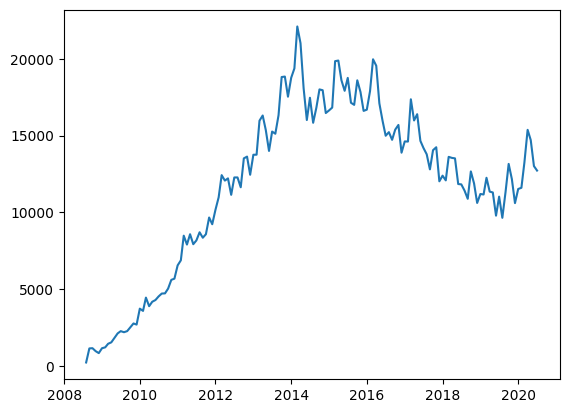

In [135]:
import matplotlib.pyplot as plt

plt.plot(data_java.Date, data_java.Count)

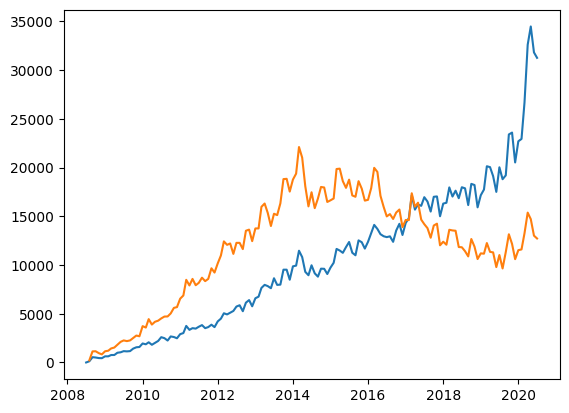

In [136]:
plt.plot(reshaped_df.index,reshaped_df['python'])
plt.plot(data_java.Date, data_java.Count)

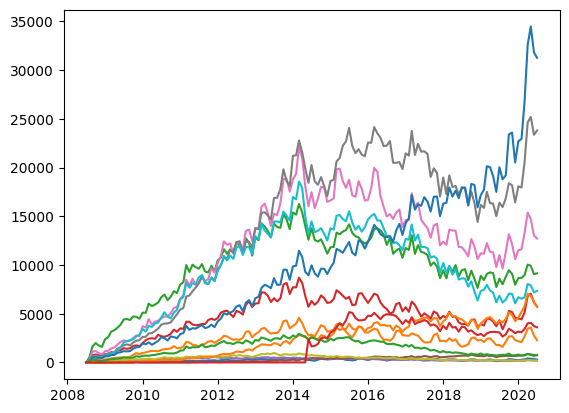

In [137]:
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

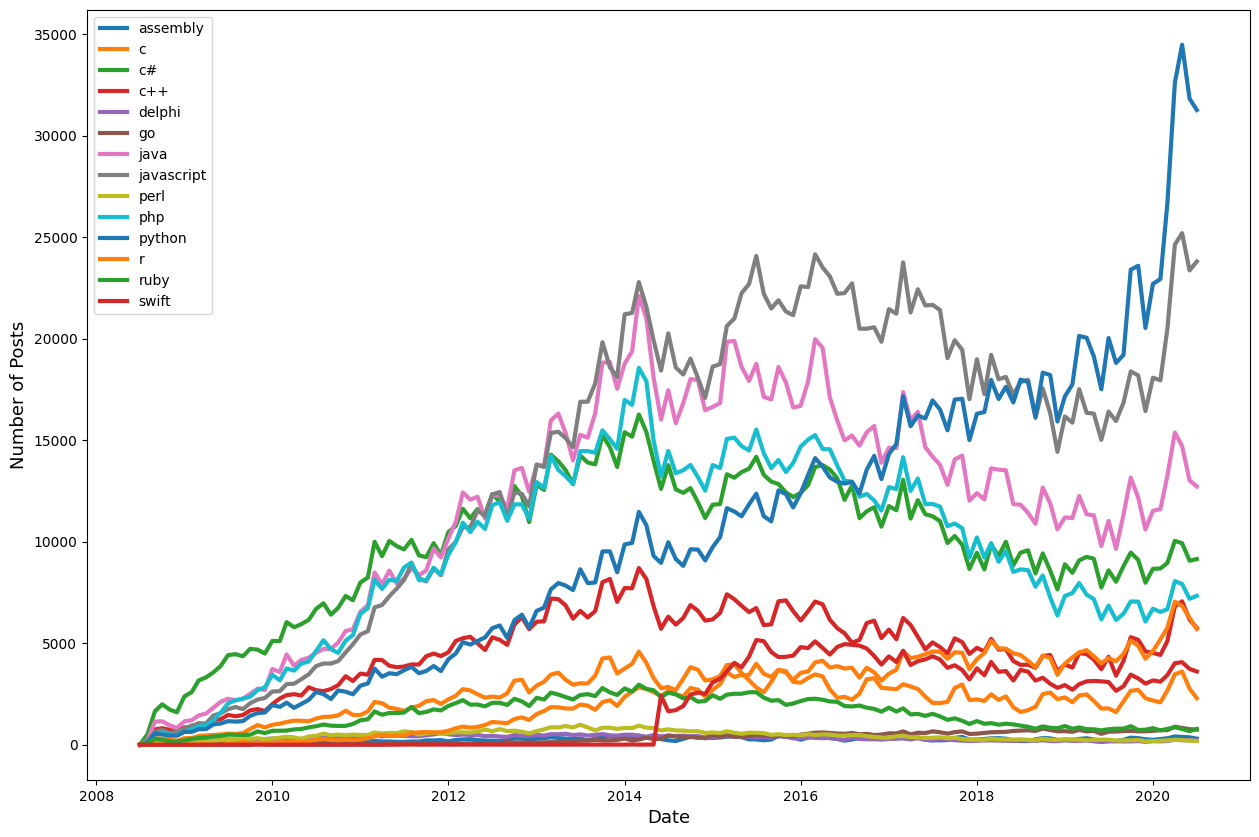

In [138]:
plt.figure(figsize=(15,10))
plt.xlabel('Date',fontsize=13)
plt.ylabel('Number of Posts', fontsize=13)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index,reshaped_df[column],linewidth = 3, label = reshaped_df[column].name)

plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

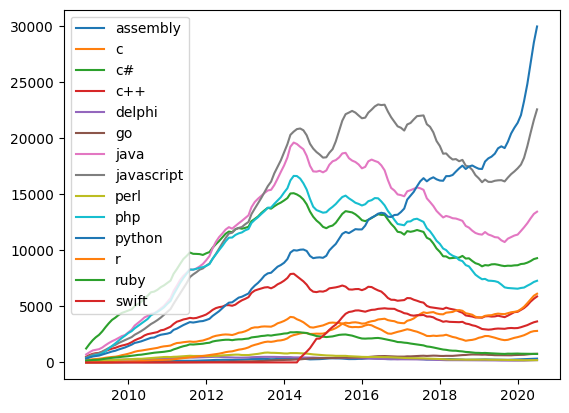

In [139]:
roll_df = reshaped_df.rolling(window=6).mean()

for column in roll_df.columns:
  plt.plot(roll_df.index,roll_df[column], label = roll_df[column].name)

plt.legend()

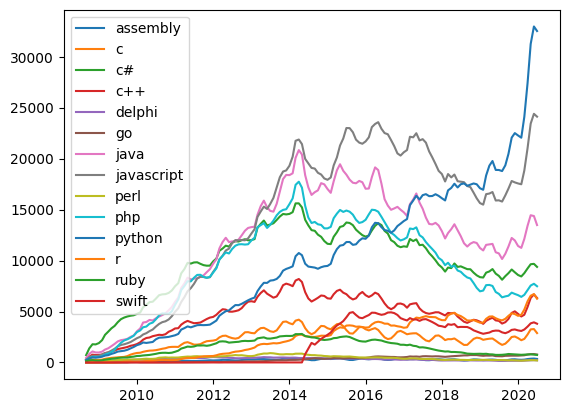

In [140]:
roll_df = reshaped_df.rolling(window=3).mean()

for column in roll_df.columns:
  plt.plot(roll_df.index,roll_df[column], label = roll_df[column].name)

plt.legend()

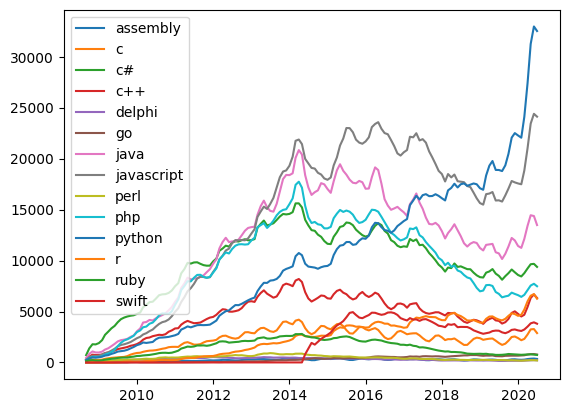

In [141]:
roll_2_df = reshaped_df.rolling(window=12).mean()

for column in roll_2_df.columns:
  plt.plot(roll_2_df.index,roll_df[column], label = roll_2_df[column].name)

plt.legend()